Check TensorFlow Version

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

Load MNIST Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


Visualise Sample Images

10 Images

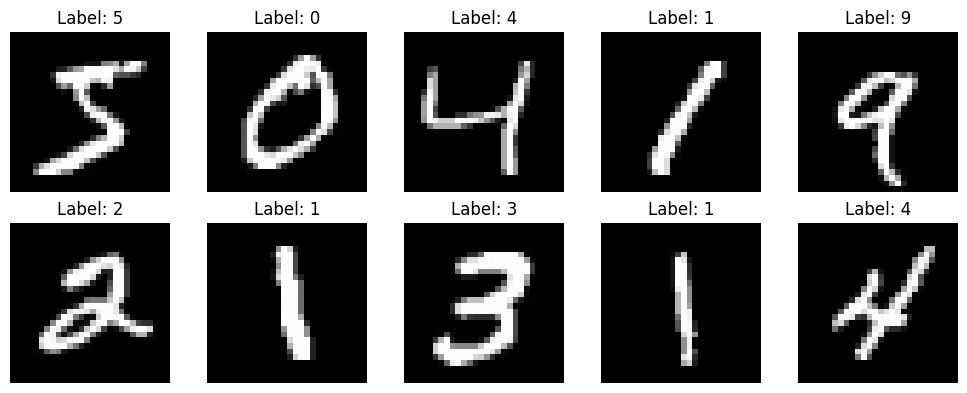

In [ ]:
plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

25 Images Grid

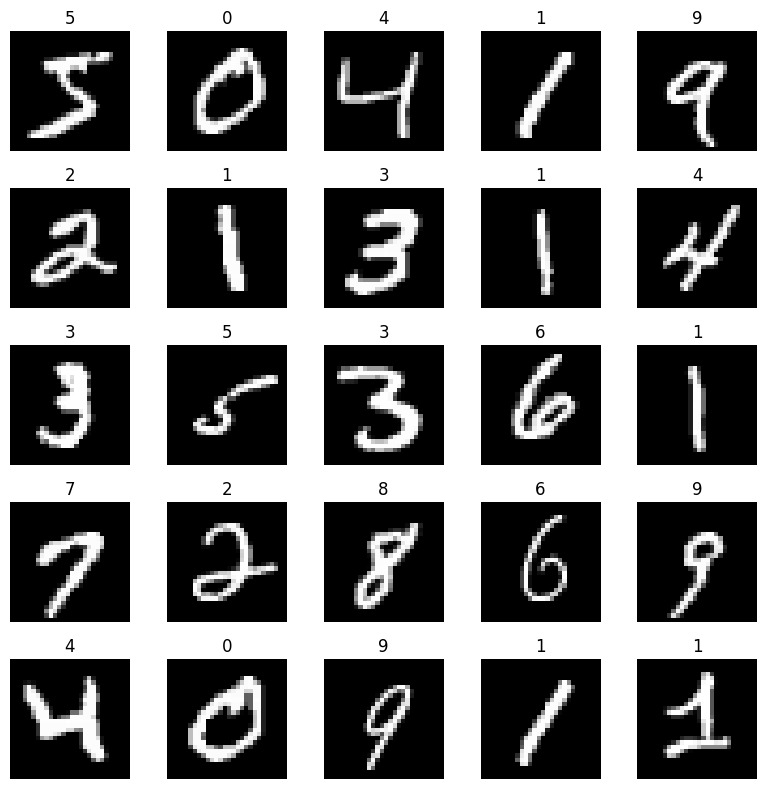

In [ ]:
plt.figure(figsize=(8,8))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

Data Preprocessing

Normalize Pixel Values

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

One-Hot Encode Labels

In [ ]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

Create Model Builder Function - This allows us to change activation functions easily.

In [ ]:
def build_model(activation_function):

    model = Sequential()

    model.add(Input(shape=(28,28)))
    model.add(Flatten())

    # Six Hidden Layers
    model.add(Dense(256, activation=activation_function))
    model.add(Dense(128, activation=activation_function))
    model.add(Dense(64, activation=activation_function))
    model.add(Dense(64, activation=activation_function))
    model.add(Dense(32, activation=activation_function))
    model.add(Dense(16, activation=activation_function))

    # Output Layer
    model.add(Dense(10, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

Experiment 1: Sigmoid Activation

In [ ]:
sigmoid_model = build_model('sigmoid')

history_sigmoid = sigmoid_model.fit(
    x_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

sigmoid_test_loss, sigmoid_test_acc = sigmoid_model.evaluate(x_test, y_test_cat)

print("Sigmoid Test Accuracy:", sigmoid_test_acc)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1892 - loss: 2.1589 - val_accuracy: 0.3904 - val_loss: 1.4507
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4104 - loss: 1.3588 - val_accuracy: 0.5462 - val_loss: 1.0897
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5999 - loss: 1.0014 - val_accuracy: 0.8014 - val_loss: 0.7668
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8222 - loss: 0.7019 - val_accuracy: 0.8551 - val_loss: 0.5220
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8564 - loss: 0.4815 - val_accuracy: 0.8626 - val_loss: 0.4355
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8699 - loss: 0.3912 - val_accuracy: 0.8853 - val_loss: 0.3625
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9173 - loss: 0.3161 - val_accuracy: 0.9449 - val_loss: 0.2785
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9531 - loss: 0.2360 - val_accurac

Make Predictions (Sigmoid)

In [ ]:
y_pred_sigmoid = sigmoid_model.predict(x_test)
y_pred_sigmoid_classes = np.argmax(y_pred_sigmoid, axis=1)

sigmoid_accuracy = np.mean(y_pred_sigmoid_classes == y_test)
sigmoid_errors = np.sum(y_pred_sigmoid_classes != y_test)

print("Sigmoid Accuracy:", sigmoid_accuracy)
print("Sigmoid Misclassifications:", sigmoid_errors)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Sigmoid Accuracy: 0.9513
Sigmoid Misclassifications: 487


In [ ]:
sigmoid_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 747,152 (2.85 MB)

 Trainable params: 249,050 (972.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 498,102 (1.90 MB)

Experiment 2: Tanh Activation

In [ ]:
tanh_model = build_model('tanh')

history_tanh = tanh_model.fit(
    x_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

tanh_test_loss, tanh_test_acc = tanh_model.evaluate(x_test, y_test_cat)

print("Tanh Test Accuracy:", tanh_test_acc)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8254 - loss: 0.7543 - val_accuracy: 0.9444 - val_loss: 0.2156
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9487 - loss: 0.1961 - val_accuracy: 0.9590 - val_loss: 0.1552
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9662 - loss: 0.1248 - val_accuracy: 0.9618 - val_loss: 0.1435
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9747 - loss: 0.0933 - val_accuracy: 0.9671 - val_loss: 0.1180
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9821 - loss: 0.0702 - val_accuracy: 0.9700 - val_loss: 0.1119
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9830 - loss: 0.0600 - val_accuracy: 0.9692 - val_loss: 0.1168
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9855 - loss: 0.0513 - val_accuracy: 0.9712 - val_loss: 0.1118
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9881 - loss: 0.0411 - val_accurac

Make Predictions (Tanh)

In [ ]:
y_pred_tanh = tanh_model.predict(x_test)
y_pred_tanh_classes = np.argmax(y_pred_tanh, axis=1)

tanh_accuracy = np.mean(y_pred_tanh_classes == y_test)
tanh_errors = np.sum(y_pred_tanh_classes != y_test)

print("Tanh Accuracy:", tanh_accuracy)
print("Tanh Misclassifications:", tanh_errors)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Tanh Accuracy: 0.9739
Tanh Misclassifications: 261


In [ ]:
tanh_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 747,152 (2.85 MB)

 Trainable params: 249,050 (972.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 498,102 (1.90 MB)

Experiment 3: ReLU Activation

In [ ]:
relu_model = build_model('relu')

history_relu = relu_model.fit(
    x_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

relu_test_loss, relu_test_acc = relu_model.evaluate(x_test, y_test_cat)

print("ReLU Test Accuracy:", relu_test_acc)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6972 - loss: 0.9046 - val_accuracy: 0.9498 - val_loss: 0.1766
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9573 - loss: 0.1483 - val_accuracy: 0.9659 - val_loss: 0.1198
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9735 - loss: 0.0887 - val_accuracy: 0.9697 - val_loss: 0.1014
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9800 - loss: 0.0673 - val_accuracy: 0.9706 - val_loss: 0.1006
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9842 - loss: 0.0528 - val_accuracy: 0.9736 - val_loss: 0.0939
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9871 - loss: 0.0418 - val_accuracy: 0.9755 - val_loss: 0.0913
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9894 - loss: 0.0327 - val_accuracy: 0.9749 - val_loss: 0.0979
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9925 - loss: 0.0259 - val_accuracy

Make Predictions (ReLU)

In [ ]:
y_pred_relu = relu_model.predict(x_test)
y_pred_relu_classes = np.argmax(y_pred_relu, axis=1)

relu_accuracy = np.mean(y_pred_relu_classes == y_test)
relu_errors = np.sum(y_pred_relu_classes != y_test)

print("ReLU Accuracy:", relu_accuracy)
print("ReLU Misclassifications:", relu_errors)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
ReLU Accuracy: 0.9766
ReLU Misclassifications: 234


In [ ]:
relu_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 747,152 (2.85 MB)

 Trainable params: 249,050 (972.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 498,102 (1.90 MB)

Compare Validation Accuracy (All 3)

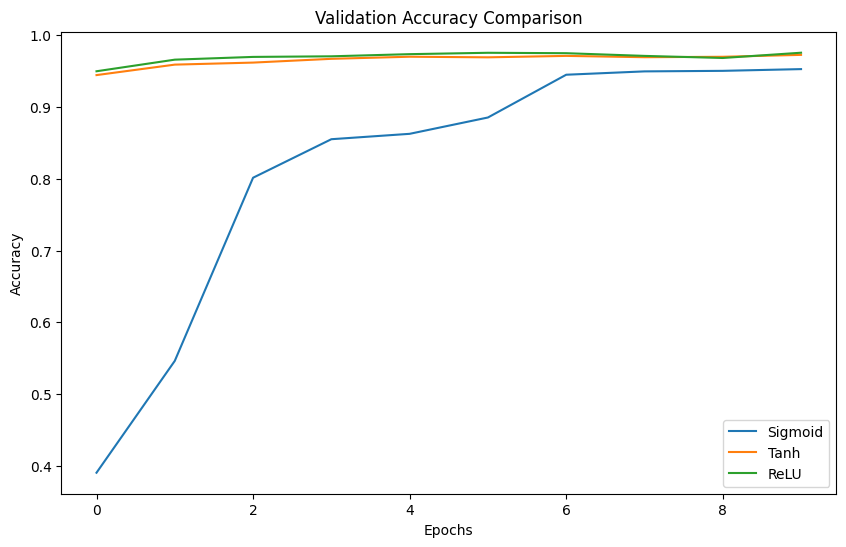

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(history_sigmoid.history['val_accuracy'], label='Sigmoid')
plt.plot(history_tanh.history['val_accuracy'], label='Tanh')
plt.plot(history_relu.history['val_accuracy'], label='ReLU')

plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Validation Loss Comparison

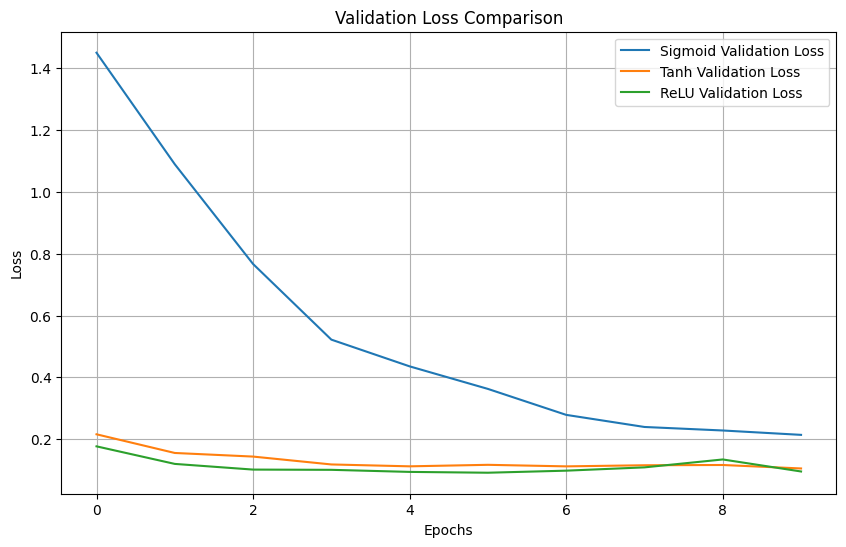

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(history_sigmoid.history['val_loss'], label='Sigmoid Validation Loss')
plt.plot(history_tanh.history['val_loss'], label='Tanh Validation Loss')
plt.plot(history_relu.history['val_loss'], label='ReLU Validation Loss')

plt.title("Validation Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.show()

Confusion Matrix (For All 3)

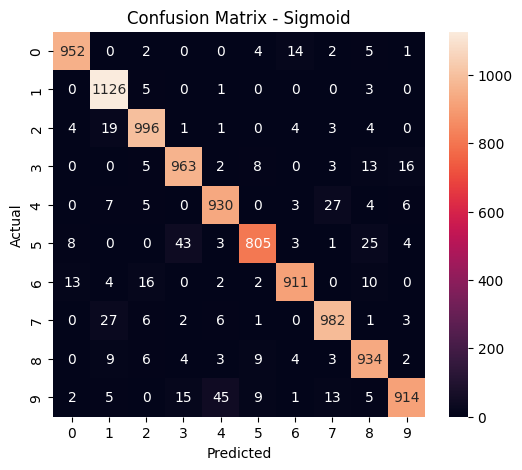

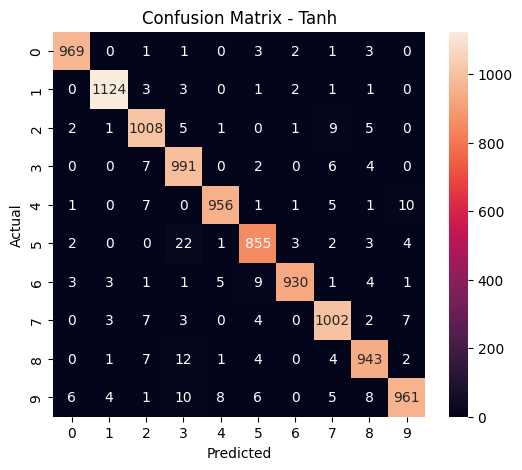

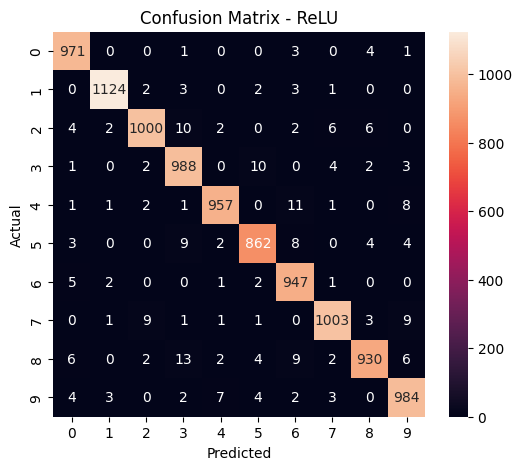

In [ ]:
cm_sigmoid = confusion_matrix(y_test, y_pred_sigmoid_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm_sigmoid, annot=True, fmt='d')
plt.title("Confusion Matrix - Sigmoid")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

cm_tanh = confusion_matrix(y_test, y_pred_tanh_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm_tanh, annot=True, fmt='d')
plt.title("Confusion Matrix - Tanh")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

cm_relu = confusion_matrix(y_test, y_pred_relu_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm_relu, annot=True, fmt='d')
plt.title("Confusion Matrix - ReLU")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Final Comparison Table

In [ ]:
comparison_data = {
    "Metric": [
        "Test Accuracy",
        "Test Loss",
        "Misclassifications"
    ],
    "Sigmoid": [
        sigmoid_test_acc,
        sigmoid_test_loss,
        sigmoid_errors
    ],
    "Tanh": [
        tanh_test_acc,
        tanh_test_loss,
        tanh_errors
    ],
    "ReLU": [
        relu_test_acc,
        relu_test_loss,
        relu_errors
    ]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df.round(4)

,Metric,Sigmoid,Tanh,ReLU
0,Test Accuracy,0.9513,0.9739,0.9766
1,Test Loss,0.2258,0.0998,0.0928
2,Misclassifications,487.0000,261.0000,234.0000


Accuracy Comparison

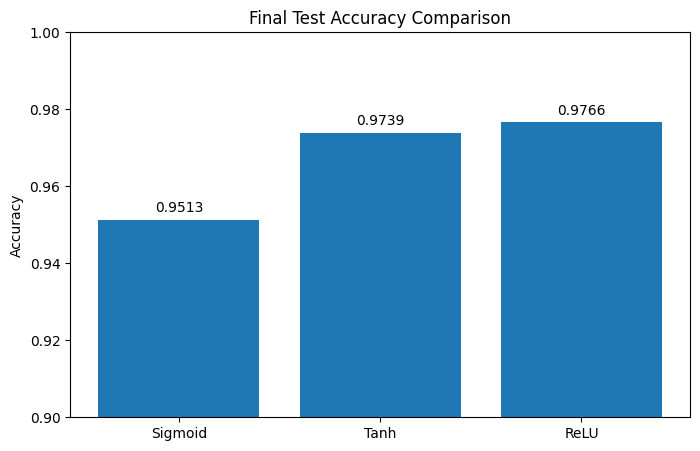

In [4]:
import matplotlib.pyplot as plt

# Final Test Accuracies
models = ['Sigmoid', 'Tanh', 'ReLU']
accuracies = [0.9513, 0.9739, 0.9766]

plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracies)

plt.title("Final Test Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.90, 1.00)

for i in range(len(models)):
    plt.text(i, accuracies[i] + 0.002, f"{accuracies[i]:.4f}", ha='center')

plt.show()

Loss Comparison

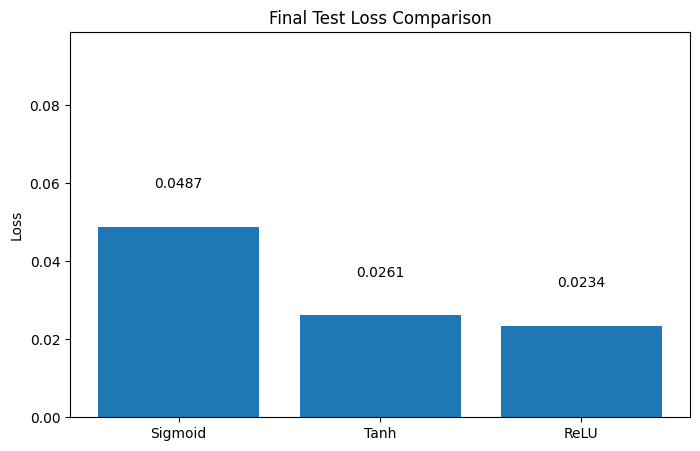

In [23]:
models = ['Sigmoid', 'Tanh', 'ReLU']
losses = [0.0487, 0.0261, 0.0234]

plt.figure(figsize=(8,5))
bars = plt.bar(models, losses)

plt.title("Final Test Loss Comparison")
plt.ylabel("Loss")

plt.ylim(0, max(losses) + 0.05)

# Add labels above bars
for i in range(len(models)):
    plt.text(i, losses[i] + 0.01, f"{losses[i]:.4f}", ha='center')

plt.show()

Misclassification Comparison

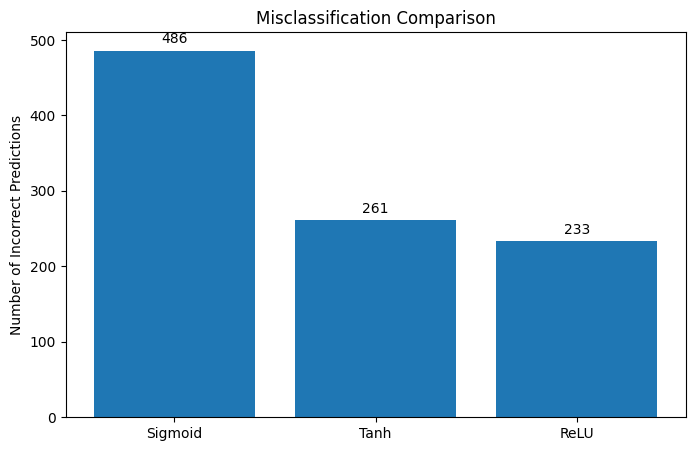

In [16]:
# Total test samples in MNIST = 10000
misclassifications = [
    int((1 - 0.9513) * 10000),
    int((1 - 0.9739) * 10000),
    int((1 - 0.9766) * 10000)
]

plt.figure(figsize=(8,5))
bars = plt.bar(models, misclassifications)

plt.title("Misclassification Comparison")
plt.ylabel("Number of Incorrect Predictions")

for i in range(len(models)):
    plt.text(i, misclassifications[i] + 10, misclassifications[i], ha='center')

plt.show()